**Installing Libraries**

In [1]:
!pip install supervision
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 28.1 MB/s eta 0:00:00


**Importing Libraries**

In [2]:
from supervision.assets import download_assets, VideoAssets
import supervision as sv

import cv2
from pathlib import Path
import shutil

import torch
import torchvision

import glob
import os
from ultralytics import YOLO
import matplotlib.pyplot as plt

import os
# if using Apple MPS, fall back to CPU for unsupported ops
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


**Downloading video from the source**

In [3]:
SOURCE_VIDEO = download_assets(VideoAssets.BASKETBALL)
sv.VideoInfo.from_video_path(SOURCE_VIDEO)

  0%|          | 0/27178650 [00:00<?, ?it/s]

VideoInfo(width=1920, height=1080, fps=59, total_frames=477)

**Check the FPS of the video**

In [4]:
# Assuming SOURCE_VIDEO is already defined
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO)

video_fps = video_info.fps + 1

# Print the frames per second (FPS)
print("FPS of the video:", video_info.fps +1)

FPS of the video: 60


**Resizing and Scaling the Video**

In [5]:
SCALE_FACTOR = 0.3
TARGET_FPS = 30
SOURCE_FPS = sv.VideoInfo.from_video_path(SOURCE_VIDEO).fps

# Set up paths
HOME = '/kaggle/working'
SOURCE_VIDEO = '/kaggle/working/basketball-1.mp4'
SOURCE_FRAMES = Path(HOME) / Path(SOURCE_VIDEO).stem

# Delete the directory if it exists, then create it fresh
if SOURCE_FRAMES.exists():
    shutil.rmtree(SOURCE_FRAMES)
SOURCE_FRAMES.mkdir(parents=True, exist_ok=True)

# Calculate frame interval to achieve approximately 30fps
frame_interval = SOURCE_FPS / TARGET_FPS

# Open video with OpenCV
cap = cv2.VideoCapture(SOURCE_VIDEO)
frame_count = 0
saved_frame_count = 1  # Counter for saved frames

# Frame processing and saving
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # Process frames at the specified interval
    if frame_count % round(frame_interval) == 0:
        # Resize frame
        frame = cv2.resize(frame, (int(frame.shape[1] * SCALE_FACTOR), int(frame.shape[0] * SCALE_FACTOR)))
        
        # Save the frame as a JPEG with consecutive numbering
        frame_filename = SOURCE_FRAMES / f"{saved_frame_count:05d}.jpeg"
        cv2.imwrite(str(frame_filename), frame)
        
        # Increment the saved frame counter
        saved_frame_count += 1

    frame_count += 1

cap.release()

**Using the YOLOv8 model for moving object Detection**

100%|██████████| 6.25M/6.25M [00:00<00:00, 210MB/s]



0: 384x640 2 persons, 1 tennis racket, 85.5ms
Speed: 7.9ms preprocess, 85.5ms inference, 245.9ms postprocess per image at shape (1, 3, 384, 640)
Frame 1, Object: 0, Conf: 0.94, Coordinates: (0, 74), (115, 321)
Frame 1, Object: 0, Conf: 0.90, Coordinates: (456, 89), (540, 306)
Frame 1, Object: 38, Conf: 0.25, Coordinates: (488, 192), (532, 211)


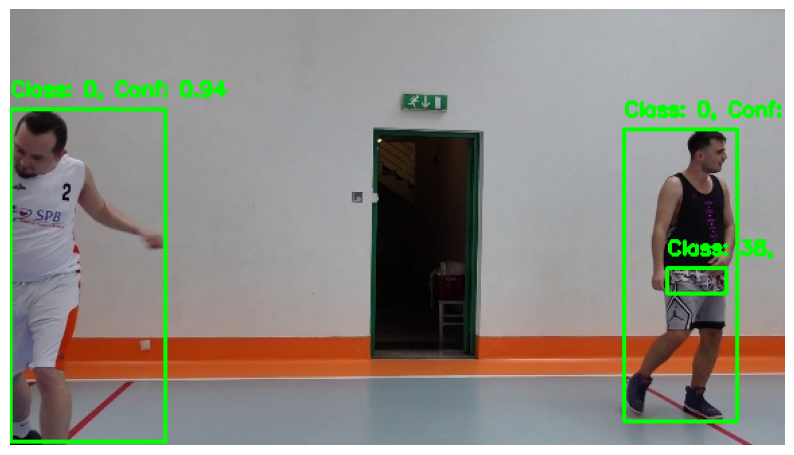


0: 384x640 2 persons, 1 skateboard, 9.4ms
Speed: 2.3ms preprocess, 9.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
Frame 2, Object: 0, Conf: 0.95, Coordinates: (0, 79), (128, 321)
Frame 2, Object: 0, Conf: 0.88, Coordinates: (462, 88), (542, 306)
Frame 2, Object: 36, Conf: 0.36, Coordinates: (479, 279), (552, 324)


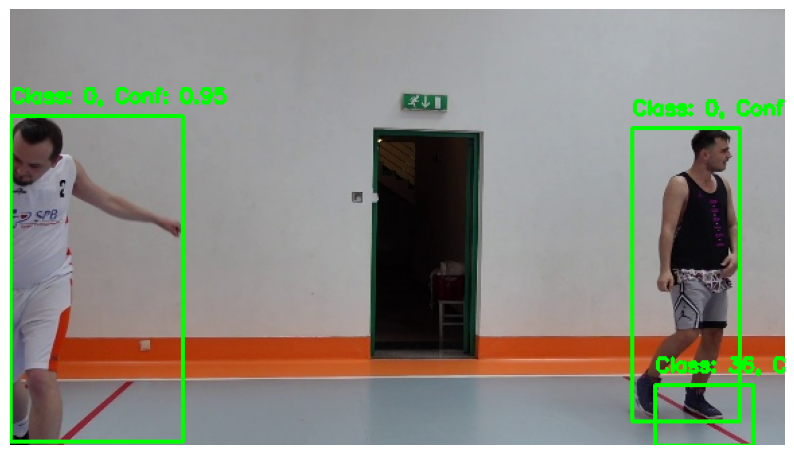


0: 384x640 2 persons, 7.5ms
Speed: 1.8ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Frame 3, Object: 0, Conf: 0.94, Coordinates: (0, 81), (115, 320)
Frame 3, Object: 0, Conf: 0.91, Coordinates: (470, 87), (551, 309)


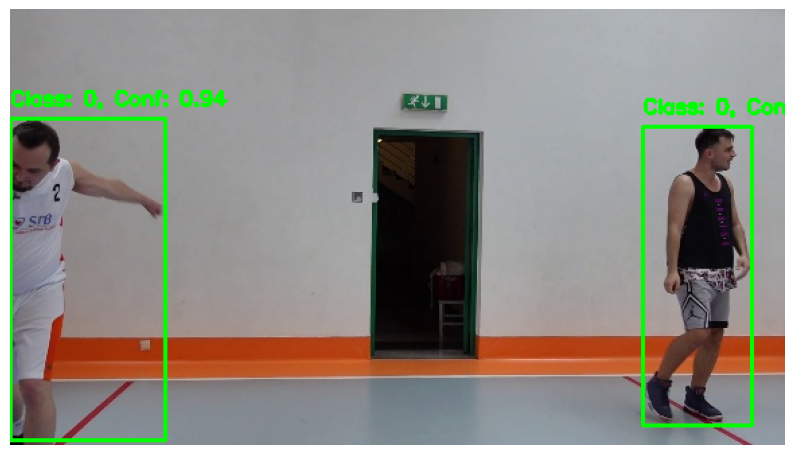


0: 384x640 2 persons, 7.5ms
Speed: 2.4ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Frame 4, Object: 0, Conf: 0.93, Coordinates: (0, 83), (98, 321)
Frame 4, Object: 0, Conf: 0.91, Coordinates: (481, 86), (559, 313)


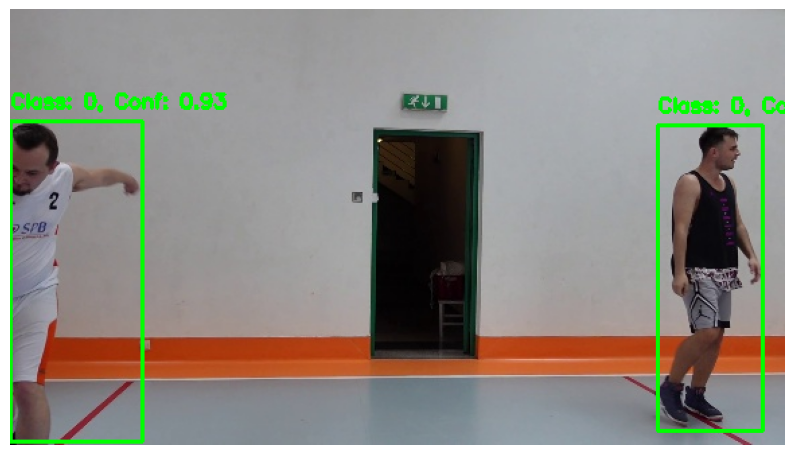


0: 384x640 2 persons, 1 tennis racket, 7.6ms
Speed: 2.4ms preprocess, 7.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
Frame 5, Object: 0, Conf: 0.92, Coordinates: (0, 83), (84, 321)
Frame 5, Object: 0, Conf: 0.90, Coordinates: (489, 86), (568, 315)
Frame 5, Object: 38, Conf: 0.26, Coordinates: (507, 190), (546, 239)


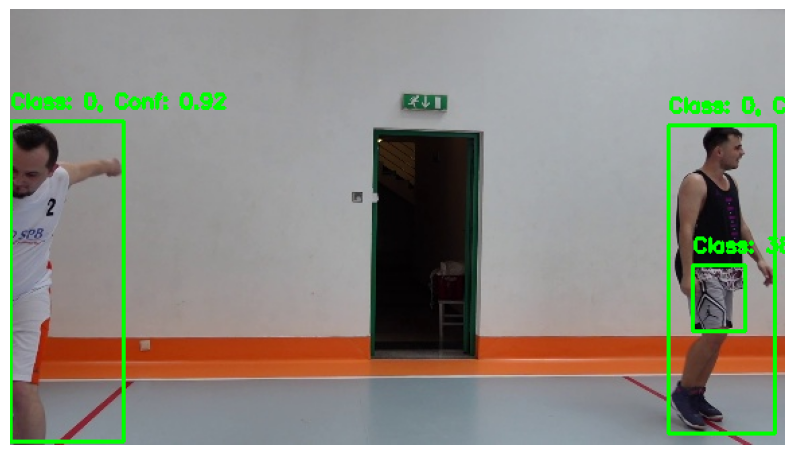


0: 384x640 2 persons, 7.4ms
Speed: 1.6ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
Frame 6, Object: 0, Conf: 0.91, Coordinates: (496, 86), (575, 318)
Frame 6, Object: 0, Conf: 0.91, Coordinates: (0, 85), (72, 320)


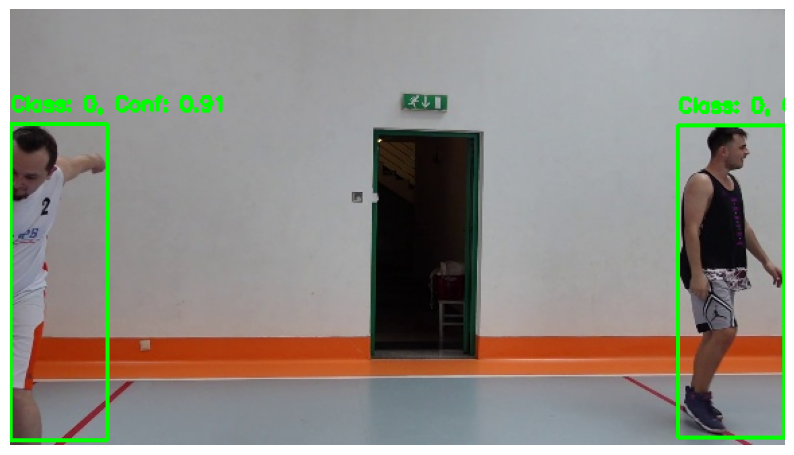


0: 384x640 2 persons, 7.4ms
Speed: 1.8ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
Frame 7, Object: 0, Conf: 0.92, Coordinates: (498, 86), (575, 320)
Frame 7, Object: 0, Conf: 0.91, Coordinates: (0, 85), (64, 320)


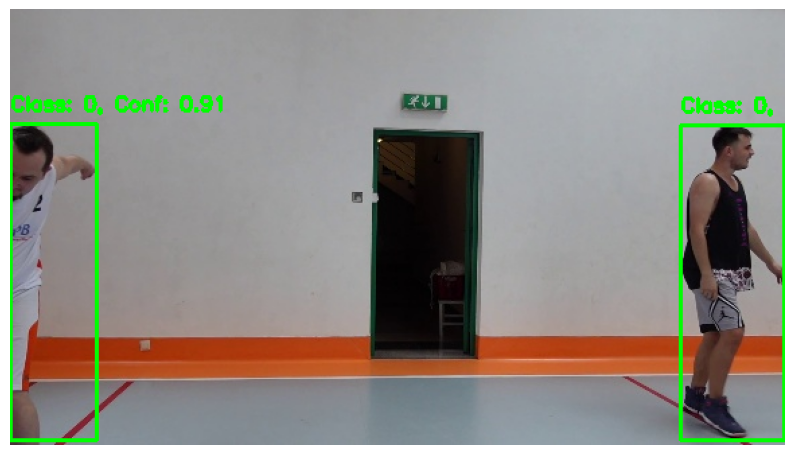


0: 384x640 2 persons, 1 skateboard, 1 tennis racket, 7.6ms
Speed: 1.8ms preprocess, 7.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
Frame 8, Object: 0, Conf: 0.92, Coordinates: (500, 86), (575, 321)
Frame 8, Object: 0, Conf: 0.91, Coordinates: (0, 83), (60, 320)
Frame 8, Object: 36, Conf: 0.53, Coordinates: (455, 272), (564, 324)
Frame 8, Object: 38, Conf: 0.40, Coordinates: (524, 191), (552, 241)


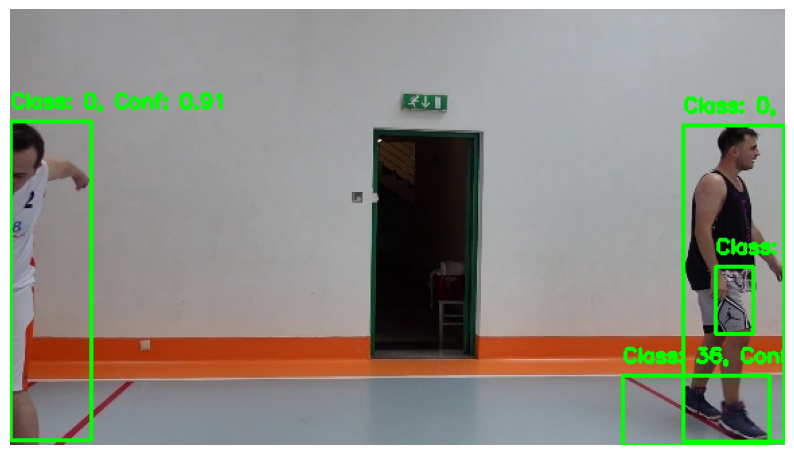


0: 384x640 2 persons, 7.5ms
Speed: 1.6ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
Frame 9, Object: 0, Conf: 0.93, Coordinates: (501, 86), (575, 323)
Frame 9, Object: 0, Conf: 0.91, Coordinates: (0, 78), (58, 320)


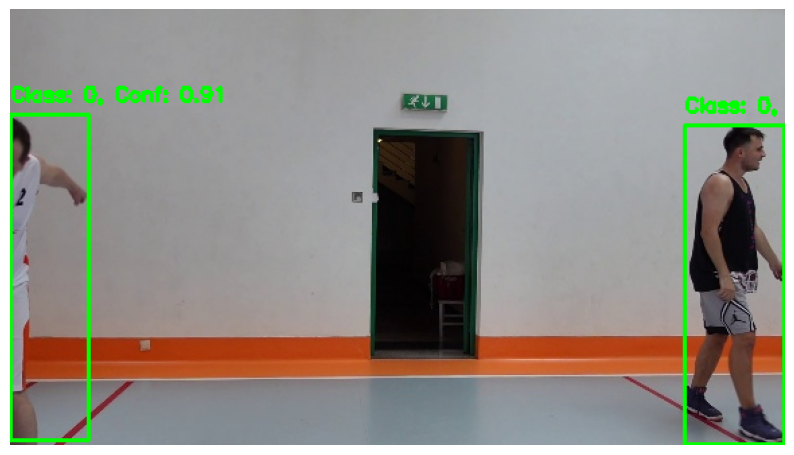


0: 384x640 2 persons, 1 tennis racket, 7.4ms
Speed: 1.8ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
Frame 10, Object: 0, Conf: 0.94, Coordinates: (501, 86), (575, 324)
Frame 10, Object: 0, Conf: 0.87, Coordinates: (0, 78), (56, 320)
Frame 10, Object: 38, Conf: 0.35, Coordinates: (530, 213), (557, 245)


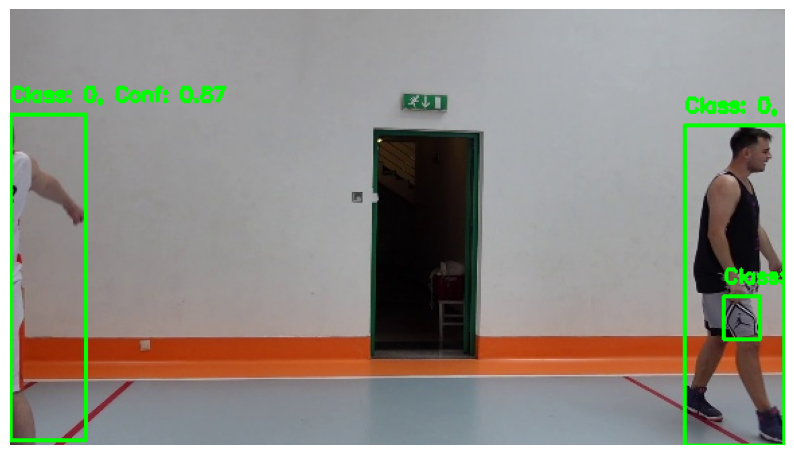

In [6]:
# Initialize YOLOv8 model and background subtractor
model = YOLO('yolov8n.pt')
back_sub = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=100, detectShadows=True)

# Specify the directory containing frames
frame_dir = '/kaggle/working/basketball-1'  # Update this to your frames directory
frame_paths = sorted(glob.glob(os.path.join(frame_dir, '*.jpeg')))[170:180]  # Get only the first 10 frames

for i, frame_path in enumerate(frame_paths):
    frame = cv2.imread(frame_path)
    if frame is None:
        print(f"Could not read frame {frame_path}")
        continue

    # Apply background subtraction
    fg_mask = back_sub.apply(frame)

    # Detect objects with YOLOv8
    results = model(frame)  # results is a list containing detection information

    # Filter and draw bounding boxes for moving objects
    moving_objects = []
    for detection in results[0].boxes:  # Use results[0].boxes for detections
        x1, y1, x2, y2 = map(int, detection.xyxy[0])  # Get bounding box coordinates
        conf = detection.conf[0]  # Confidence score
        cls = detection.cls[0]  # Class label
        
        # Check if the detected object has motion
        if fg_mask[y1:y2, x1:x2].mean() > 0:  # Adjust threshold as needed
            moving_objects.append((x1, y1, x2, y2, conf, cls))
            # Draw bounding box on the frame
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box
            label = f"Class: {int(cls)}, Conf: {conf:.2f}"
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

            # Print coordinates of moving objects
            print(f"Frame {i+1}, Object: {int(cls)}, Conf: {conf:.2f}, Coordinates: ({x1}, {y1}), ({x2}, {y2})")

    # Convert the frame from BGR to RGB before displaying with matplotlib
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Display the frame with moving object bounding boxes using matplotlib
    plt.figure(figsize=(10, 6))
    plt.imshow(frame_rgb)  # Use plt.imshow with RGB frame
    plt.axis('off')  # Hide axes for better visualization
    plt.show()


**The following Algorithm uses the result of the bounding boxes from the YOLO model and then generate the most accurate prompt**

In [7]:
# Setup background subtraction and other required components
back_sub = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=100, detectShadows=True)

# Assuming SAM2 model and other configurations
video_dir = '/kaggle/working/basketball-1'
frame_paths = sorted(glob.glob(os.path.join(video_dir, '*.jpeg')))
THRESHOLD_CONFIDENCE = 0.5  # Confidence threshold for YOLO
inf_state = False
mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)

# Initialize the dictionary to store consistent detections
consistent_detections_dict = {}

# Pipeline Execution
frame_idx = 0
while frame_idx < len(frame_paths):
    frame = cv2.imread(frame_paths[frame_idx])
    if frame is None:
        print(f"Could not read frame {frame_idx}")
        frame_idx += 1
        continue

    # Step 1: Apply YOLO-based motion detection if SAM2 is not active
    if not inf_state:
        fg_mask = back_sub.apply(frame)
        results = model(frame)

        detected_objects = []
        for detection in results[0].boxes:
            x1, y1, x2, y2 = map(int, detection.xyxy[0])
            conf = detection.conf[0]
            cls = detection.cls[0]

            # Check confidence threshold and motion (using background subtraction mask)
            if conf >= THRESHOLD_CONFIDENCE and fg_mask[y1:y2, x1:x2].mean() > 2:
                detected_objects.append((int(cls), x1, y1, x2, y2, conf))

        # If no objects were detected, continue to the next frame
        if not detected_objects:
            frame_idx += 1
            continue

        # Check for consistency of detected objects in the next 2 frames (based on class id)
        consistent_objects = []
        for obj_id, x1, y1, x2, y2, conf in detected_objects:
            consistent = True
            for offset in range(1, 5):  # Check the next 2 frames
                if frame_idx + offset >= len(frame_paths):
                    consistent = False
                    break
                next_frame = cv2.imread(frame_paths[frame_idx + offset])
                if next_frame is None:
                    consistent = False
                    break
                next_results = model(next_frame)

                # Check if object with the same class id is detected in the next frame
                found = any(
                    det.cls[0] == obj_id for det in next_results[0].boxes
                )
                if not found:
                    consistent = False
                    break

            if consistent:
                # If the object is consistently detected, add it to the list
                consistent_objects.append((obj_id, x1, y1, x2, y2, conf))

        # If there are consistent objects, store them in the dictionary with the most recent frame_idx
        if consistent_objects:
            # Update dictionary with the most recent frame_idx as key and bounding boxes as values
            consistent_detections_dict[frame_idx] = [(x1, y1, x2, y2, cls) for _, x1, y1, x2, y2, conf in consistent_objects]

            # Process the consistent detections (you can replace this with your function to do something with the boxes)
            # Assuming a function like process_detected_objects exists:
            # process_detected_objects(frame_idx, consistent_objects)

            # After processing, skip the next 29 frames second frames and update frame_idx
            frame_idx += 30
        else:
            frame_idx += 1
    else:
        # SAM2-specific logic (if needed for your application)
        # Example: result = sam2_model.predict(frame)
        frame_idx += 1

    print(f"Processed frame {frame_idx}")

# Now `consistent_detections_dict` contains the most recent frame_idx with the bounding boxes of consistent objects


0: 384x640 (no detections), 7.4ms
Speed: 2.7ms preprocess, 7.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.0ms
Speed: 2.1ms preprocess, 7.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.9ms
Speed: 1.5ms preprocess, 6.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.9ms
Speed: 2.1ms preprocess, 6.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.8ms
Speed: 1.5ms preprocess, 6.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.8ms
Speed: 1.6ms preprocess, 6.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.0ms
Speed: 2.1ms preprocess, 7.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.9ms
Speed: 1.6ms preprocess, 6.9ms inference, 0.5ms 

Visualising the generated Prompts

In [8]:
consistent_detections_dict

{21: [(545, 127, 575, 315, tensor(0., device='cuda:0'))],
 51: [(301, 95, 381, 306, tensor(0., device='cuda:0')),
  (397, 96, 473, 280, tensor(0., device='cuda:0'))],
 81: [(122, 156, 289, 317, tensor(0., device='cuda:0')),
  (315, 103, 384, 286, tensor(0., device='cuda:0'))],
 111: [(181, 54, 277, 310, tensor(0., device='cuda:0')),
  (318, 19, 410, 305, tensor(0., device='cuda:0'))],
 141: [(373, 62, 471, 310, tensor(38., device='cuda:0')),
  (126, 75, 207, 321, tensor(38., device='cuda:0'))],
 171: [(0, 79, 128, 321, tensor(36., device='cuda:0')),
  (462, 88, 542, 306, tensor(36., device='cuda:0'))]}

**Installing Repository of SAM_2**

In [9]:
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())
import sys
!{sys.executable} -m pip install opencv-python matplotlib
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/sam2.git'

# !mkdir -p videos
# !wget -P videos https://dl.fbaipublicfiles.com/segment_anything_2/assets/bedroom.zip
# !unzip -d videos videos/bedroom.zip

!mkdir -p ../checkpoints/
!wget -P ../checkpoints/ https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_large.pt

PyTorch version: 2.4.0
Torchvision version: 0.19.0
CUDA is available: True
  Cloning https://github.com/facebookresearch/sam2.git to /tmp/pip-req-build-to9g4j8l
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/sam2.git /tmp/pip-req-build-to9g4j8l
  Resolved https://github.com/facebookresearch/sam2.git to commit c2ec8e14a185632b0a5d8b161928ceb50197eddc
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 5.8 MB/s eta 0:00:00
  Created wheel for SAM-2: filename=SAM_2-1.0-py3-none-any.whl size

In [10]:
# select the device for computation
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")
print(f"using device: {device}")

if device.type == "cuda":
    # use bfloat16 for the entire notebook
    torch.autocast("cuda", dtype=torch.bfloat16).__enter__()
    # turn on tfloat32 for Ampere GPUs (https://pytorch.org/docs/stable/notes/cuda.html#tensorfloat-32-tf32-on-ampere-devices)
    if torch.cuda.get_device_properties(0).major >= 8:
        torch.backends.cuda.matmul.allow_tf32 = True
        torch.backends.cudnn.allow_tf32 = True
elif device.type == "mps":
    print(
        "\nSupport for MPS devices is preliminary. SAM 2 is trained with CUDA and might "
        "give numerically different outputs and sometimes degraded performance on MPS. "
        "See e.g. https://github.com/pytorch/pytorch/issues/84936 for a discussion."
    )

using device: cuda


**Initialize the SAM2 predictor Function**

In [11]:
from sam2.build_sam import build_sam2_video_predictor

sam2_checkpoint = "../checkpoints/sam2.1_hiera_large.pt"
model_cfg = "configs/sam2.1/sam2.1_hiera_l.yaml"

predictor = build_sam2_video_predictor(model_cfg, sam2_checkpoint, device=device)

**Defining the Function of mask visualisation**

In [12]:
def show_mask(mask, ax, obj_id=None, random_color=False, color=(1, 0, 0)):
    # Use fixed color if random_color is False
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        # This part ensures the color is always the same
        color = np.array([*color, 0.6])  # You can set `color` to any RGB tuple, like (1, 0, 0) for red
    
    h, w = mask.shape[-2:]  # Get height and width of the mask
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)  # Apply color to the mask
    ax.imshow(mask_image)

**Loading the Video**

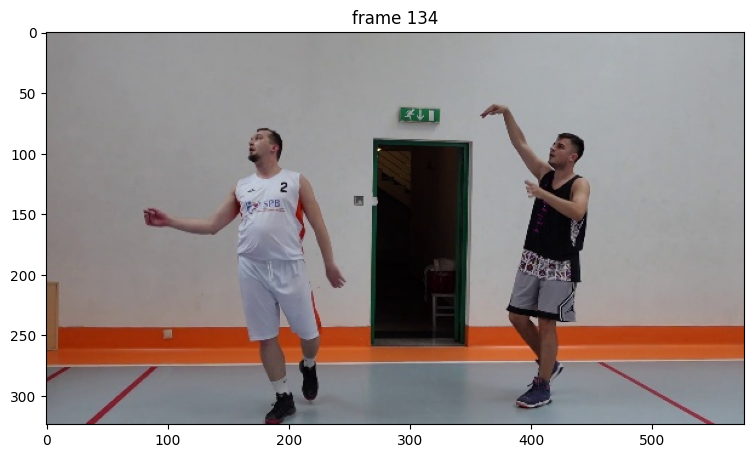

In [13]:
# `video_dir` a directory of JPEG frames with filenames like `<frame_index>.jpg`
video_dir = "/kaggle/working/basketball-1"

# scan all the JPEG frame names in this directory
frame_names = [
    p for p in os.listdir(video_dir)
    if os.path.splitext(p)[-1] in [".jpg", ".jpeg", ".JPG", ".JPEG"]
]
frame_names.sort(key=lambda p: int(os.path.splitext(p)[0]))

# take a look the first video frame
frame_idx = 134
plt.figure(figsize=(9, 6))
plt.title(f"frame {frame_idx}")
plt.imshow(Image.open(os.path.join(video_dir, frame_names[frame_idx])))

**Set the inference state on the video**

In [14]:
inference_state = predictor.init_state(video_path=video_dir)

frame loading (JPEG): 100%|██████████| 239/239 [00:06<00:00, 37.16it/s]


Function to save the generated Images

In [15]:
def save_rendered_images(video_segments, start_frame, end_frame, output_folder="output_images"):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)
    
    for out_frame_idx in range(start_frame, end_frame + 1):
        # Open the frame image
        frame_path = os.path.join(video_dir, frame_names[out_frame_idx])
        plt.imshow(Image.open(frame_path))
        
        plt.axis('off')  # Turn off the axes

        # Show each mask on the current frame
        for out_obj_id, out_mask in video_segments.get(out_frame_idx, {}).items():
            show_mask(out_mask, plt.gca(), obj_id=out_obj_id)

        # Save the rendered image to the output folder with zero-padded numbering
        output_path = os.path.join(output_folder, f"{out_frame_idx:05}.jpeg")
        plt.savefig(output_path, bbox_inches='tight', pad_inches=0, dpi=100)

        # Close the figure to avoid memory issues and to prepare for the next frame
        plt.close()

**Defining A Function that will implement the SAM_2 pipeline**

In [16]:
def Func(prompts, start_frame, end_frame, to_save):
    predictor.reset_state(inference_state)
    
    ann_frame_idx = start_frame  # The frame index we interact with

    # Check if prompts is 1D or 2D, and handle accordingly
    if isinstance(prompts[0], list) or isinstance(prompts[0], np.ndarray):
        # Multiple boxes in prompts (2D array)
        for i, box in enumerate(prompts):
            ann_obj_id = i + 1  # Assign unique ID to each object box in the frame
            _, out_obj_ids, out_mask_logits = predictor.add_new_points_or_box(
                inference_state=inference_state,
                frame_idx=ann_frame_idx,
                obj_id=ann_obj_id,
                box=np.array(box, dtype=np.float32),
            )
    else:
        # Single box in prompts (1D array)
        ann_obj_id = 4  # Set a unique ID for the object
        _, out_obj_ids, out_mask_logits = predictor.add_new_points_or_box(
            inference_state=inference_state,
            frame_idx=ann_frame_idx,
            obj_id=ann_obj_id,
            box=np.array(prompts, dtype=np.float32),
        )
    
    # Run propagation throughout the video and collect the results in a dict
    video_segments = {}
    for out_frame_idx, out_obj_ids, out_mask_logits in predictor.propagate_in_video(inference_state):
        video_segments[out_frame_idx] = {
            out_obj_id: (out_mask_logits[i] > 0.0).cpu().numpy()
            for i, out_obj_id in enumerate(out_obj_ids)
        }
        
        # Breaking the loop if end_frame is reached
        if out_frame_idx == end_frame:
            break

    # Render the segmentation results for each frame
    plt.close("all")
    if to_save:
        save_rendered_images(video_segments, start_frame, end_frame, output_folder="output_frames")
    else:
        for out_frame_idx in range(start_frame, end_frame + 1):
            plt.figure(figsize=(6, 4))
            plt.title(f"Frame {out_frame_idx}")

            # Open the frame image
            frame_path = os.path.join(video_dir, frame_names[out_frame_idx])
            plt.imshow(Image.open(frame_path))

            # Show each mask on the current frame
            for out_obj_id, out_mask in video_segments.get(out_frame_idx, {}).items():
                show_mask(out_mask, plt.gca(), obj_id=out_obj_id)

            # Display the frame
            plt.show()

**Visualize the segmented result on some frames**


Skipping the post-processing step due to the error above. You can still use SAM 2 and it's OK to ignore the error above, although some post-processing functionality may be limited (which doesn't affect the results in most cases; see https://github.com/facebookresearch/sam2/blob/main/INSTALL.md).
propagate in video:   1%|          | 2/208 [00:01<02:00,  1.72it/s]


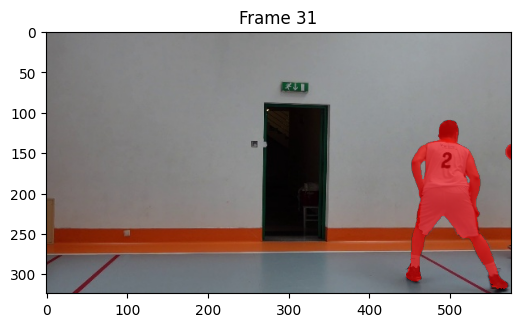

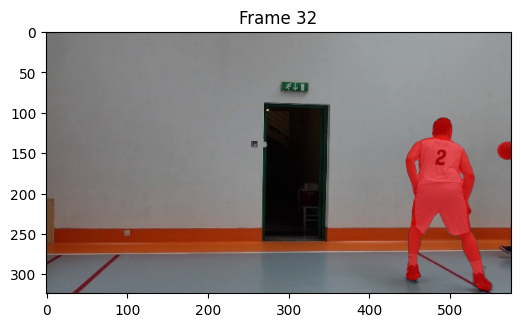

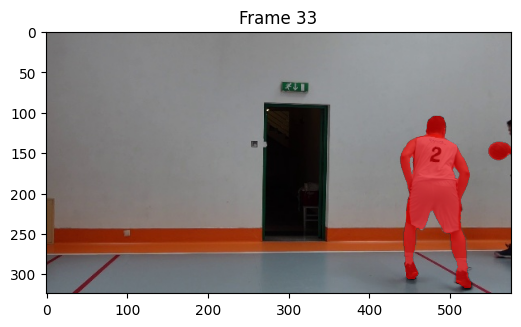

In [17]:
prompt2 = [[439,104,532,320], [547,136,576,160]]
Func(prompt2, 31, 33, False)

Creating a director to store the output frames

In [18]:
output_folder = "output_frames"

# Create the directory if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

**Copy the input images to the output**

In [19]:
for filename in os.listdir('/kaggle/working/basketball-1'):
    source_path = os.path.join('/kaggle/working/basketball-1', filename)
    destination_path = os.path.join('/kaggle/working/output_frames', filename)
    
    # Copy only if it's a file (ignoring subdirectories)
    if os.path.isfile(source_path):
        shutil.copy2(source_path, destination_path)

**Give the previously generated prompts to SAM2**

In [20]:
for frame_id in consistent_detections_dict.keys():
    prompt=[]
    for item in consistent_detections_dict[frame_id]:
        prompt.append(list(item[:4]))
    Func(prompt,frame_id,frame_id+29,True)

propagate in video:  13%|█▎        | 29/218 [00:16<01:50,  1.71it/s]

Skipping the post-processing step due to the error above. You can still use SAM 2 and it's OK to ignore the error above, although some post-processing functionality may be limited (which doesn't affect the results in most cases; see https://github.com/facebookresearch/sam2/blob/main/INSTALL.md).
propagate in video:  15%|█▌        | 29/188 [00:20<01:51,  1.42it/s]

Skipping the post-processing step due to the error above. You can still use SAM 2 and it's OK to ignore the error above, although some post-processing functionality may be limited (which doesn't affect the results in most cases; see https://github.com/facebookresearch/sam2/blob/main/INSTALL.md).
propagate in video:  18%|█▊        | 29/158 [00:20<01:30,  1.42it/s]

Skipping the post-processing step due to the error above. You can still use SAM 2 and it's OK to ignore the error above, although some post-processing functionality may be limited (which doesn't a

Function to render video using the Frames

In [21]:
def create_video_from_frames(input_folder="output_frames", output_video="output_video.mp4", fps=30, target_size=(576, 324)):
    # Get a sorted list of image files, in ascending numerical order
    image_files = sorted(
        [img for img in os.listdir(input_folder) if img.endswith((".png", ".jpeg", ".jpg"))],
        key=lambda x: int(os.path.splitext(x)[0])  # Assumes filenames are numeric
    )

    # Ensure the folder is not empty
    if not image_files:
        print("No images found in the folder.")
        return

    # Read the first image to get frame size
    first_frame = cv2.imread(os.path.join(input_folder, image_files[0]))
    if first_frame is None:
        print(f"Error loading the first image: {image_files[0]}")
        return

    # Ensure the target size is consistent
    height, width, _ = first_frame.shape
    target_width, target_height = target_size

    # Define the codec and create the video writer
    fourcc = cv2.VideoWriter_fourcc(*"mp4v")
    video_writer = cv2.VideoWriter(output_video, fourcc, fps, (target_width, target_height))

    # Process each image
    for image_file in image_files:
        image_path = os.path.join(input_folder, image_file)
        frame = cv2.imread(image_path)
        
        if frame is None:
            print(f"Error reading image {image_path}. Skipping this frame.")
            continue
        
        # Resize the frame if necessary
        if frame.shape[1] != target_width or frame.shape[0] != target_height:
            frame = cv2.resize(frame, (target_width, target_height))
            print(f"Resized {image_file} to {target_width}x{target_height}")
        
        video_writer.write(frame)

    # Release the video writer
    video_writer.release()
    print(f"Video successfully saved as {output_video}")

In [22]:
create_video_from_frames(input_folder="output_frames", output_video="rendered_video2.mp4", fps=30)

Resized 00021.jpeg to 576x324
Resized 00022.jpeg to 576x324
Resized 00023.jpeg to 576x324
Resized 00024.jpeg to 576x324
Resized 00025.jpeg to 576x324
Resized 00026.jpeg to 576x324
Resized 00027.jpeg to 576x324
Resized 00028.jpeg to 576x324
Resized 00029.jpeg to 576x324
Resized 00030.jpeg to 576x324
Resized 00031.jpeg to 576x324
Resized 00032.jpeg to 576x324
Resized 00033.jpeg to 576x324
Resized 00034.jpeg to 576x324
Resized 00035.jpeg to 576x324
Resized 00036.jpeg to 576x324
Resized 00037.jpeg to 576x324
Resized 00038.jpeg to 576x324
Resized 00039.jpeg to 576x324
Resized 00040.jpeg to 576x324
Resized 00041.jpeg to 576x324
Resized 00042.jpeg to 576x324
Resized 00043.jpeg to 576x324
Resized 00044.jpeg to 576x324
Resized 00045.jpeg to 576x324
Resized 00046.jpeg to 576x324
Resized 00047.jpeg to 576x324
Resized 00048.jpeg to 576x324
Resized 00049.jpeg to 576x324
Resized 00050.jpeg to 576x324
Resized 00051.jpeg to 576x324
Resized 00052.jpeg to 576x324
Resized 00053.jpeg to 576x324
Resized 00

Display Video

In [23]:
from IPython.display import Video, display

# Path to the output video file
output_video_path = "/kaggle/working/rendered_video2.mp4"

# Display the video in the notebook
display(Video(output_video_path, embed=True))